# DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans

In [ ]:
df1 = pd.read_csv("/content/Case Study - Customer.csv")
df1


,CustomerID;Age;Gender;Marital Status;Income
0,1;55;1;Married;5
1,2;60;1;Married;6
2,3;32;1;Married;9
3,4;31;1;Married;4
4,5;58;1;Married;3
...,...
442,443;33;1;;9
443,444;53;0;Married;15
444,445;51;0;Married;14
445,446;57;0;Married;7


In [ ]:
df1[['CustomerID', 'Age', 'Gender', 'Marital Status', 'Income']] = df1['CustomerID;Age;Gender;Marital Status;Income'].str.split(';', expand=True)

df1.drop('CustomerID;Age;Gender;Marital Status;Income', axis=1, inplace=True)

print(df1)






    CustomerID Age Gender Marital Status Income
0            1  55      1        Married      5
1            2  60      1        Married      6
2            3  32      1        Married      9
3            4  31      1        Married      4
4            5  58      1        Married      3
..         ...  ..    ...            ...    ...
442        443  33      1                     9
443        444  53      0        Married     15
444        445  51      0        Married     14
445        446  57      0        Married      7
446        447  54      1        Married     20

[447 rows x 5 columns]


In [ ]:
df2 = pd.read_csv("/content/Case Study - Product.csv")
df2

,ProductID;Product Name;Price
0,P1;Choco Bar;8800
1,P2;Ginger Candy ;3200
2,P3;Crackers;7500
3,P4;Potato Chip;12000
4,P5;Thai Tea;4200
5,P6;Cashew;18000
6,P7;Coffee Candy;9400
7,P8;Oat;16000
8,P9;Yoghurt;10000
9,P10;Cheese Stick;15000


In [ ]:
df2[['ProductID', 'Product Name', 'Price']] = df2['ProductID;Product Name;Price'].str.split(';', expand=True)

df2.drop('ProductID;Product Name;Price', axis=1, inplace=True)

print(df2)

  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
5        P6         Cashew  18000
6        P7   Coffee Candy   9400
7        P8            Oat  16000
8        P9        Yoghurt  10000
9       P10   Cheese Stick  15000


In [ ]:
df3 = pd.read_csv("/content/Case Study - Store1.csv")
df3

,StoreID;StoreName;GroupStore;Type,Latitude,Longitude
0,1;Prima Tendean;Prima;Modern Trade;-6,2;106,816666
1,2;Prima Kelapa Dua;Prima;Modern Trade;-6,914864;107,608238
2,3;Prima Kota;Prima;Modern Trade;-7,797068;110,370529
3,4;Gita Ginara;Gita;General Trade;-6,966667;110,416664
4,5;Bonafid;Gita;General Trade;-7,250445;112,768845
5,6;Lingga;Lingga;Modern Trade;-5,135399;119,42379
6,7;Buana Indah;Buana;General Trade;3,316694;114,590111
7,8;Sinar Harapan;Harapan Baru;General Trade;5,54829;95,323753
8,9;Lingga;Lingga;Modern Trade;-3,654703;128,190643
9,10;Harapan Baru;Harapan Baru;General Trade;3,597031;98,678513


In [ ]:
z = df3[['Latitude', 'Longitude']]
z

,Latitude,Longitude
0,2;106,816666
1,914864;107,608238
2,797068;110,370529
3,966667;110,416664
4,250445;112,768845
5,135399;119,42379
6,316694;114,590111
7,54829;95,323753
8,654703;128,190643
9,597031;98,678513


In [ ]:
df3 = df3.drop(z, axis=1)

In [ ]:
df3

,StoreID;StoreName;GroupStore;Type
0,1;Prima Tendean;Prima;Modern Trade;-6
1,2;Prima Kelapa Dua;Prima;Modern Trade;-6
2,3;Prima Kota;Prima;Modern Trade;-7
3,4;Gita Ginara;Gita;General Trade;-6
4,5;Bonafid;Gita;General Trade;-7
5,6;Lingga;Lingga;Modern Trade;-5
6,7;Buana Indah;Buana;General Trade;3
7,8;Sinar Harapan;Harapan Baru;General Trade;5
8,9;Lingga;Lingga;Modern Trade;-3
9,10;Harapan Baru;Harapan Baru;General Trade;3


In [ ]:
df3 = df3['StoreID;StoreName;GroupStore;Type'].apply(lambda x: x[:-2])

In [ ]:
rows_to_select = [0, 1, 2, 3, 4, 5, 8, 11, 12, 13]
rows = [6, 7, 9, 10]

In [ ]:
a = df3.iloc[rows_to_select].apply(lambda x: x[:-1])
b = df3.iloc[rows]

In [ ]:
df3 = pd.concat([a, b])
df3

0             1;Prima Tendean;Prima;Modern Trade
1          2;Prima Kelapa Dua;Prima;Modern Trade
2                3;Prima Kota;Prima;Modern Trade
3               4;Gita Ginara;Gita;General Trade
4                   5;Bonafid;Gita;General Trade
5                   6;Lingga;Lingga;Modern Trade
8                   9;Lingga;Lingga;Modern Trade
11      12;Prestasi Utama;Prestasi;General Trade
12                  13;Buana;Buana;General Trade
13             14;Priangan;Priangan;Modern Trade
6              7;Buana Indah;Buana;General Trade
7     8;Sinar Harapan;Harapan Baru;General Trade
9     10;Harapan Baru;Harapan Baru;General Trade
10       11;Sinar Harapan;Prestasi;General Trade
Name: StoreID;StoreName;GroupStore;Type, dtype: object

In [ ]:
df3 = pd.concat([df3, z], axis=1)

In [ ]:
df3

,StoreID;StoreName;GroupStore;Type,Latitude,Longitude
0,1;Prima Tendean;Prima;Modern Trade,2;106,816666
1,2;Prima Kelapa Dua;Prima;Modern Trade,914864;107,608238
2,3;Prima Kota;Prima;Modern Trade,797068;110,370529
3,4;Gita Ginara;Gita;General Trade,966667;110,416664
4,5;Bonafid;Gita;General Trade,250445;112,768845
5,6;Lingga;Lingga;Modern Trade,135399;119,42379
8,9;Lingga;Lingga;Modern Trade,654703;128,190643
11,12;Prestasi Utama;Prestasi;General Trade,990934;104,756554
12,13;Buana;Buana;General Trade,26916;116,825264
13,14;Priangan;Priangan;Modern Trade,45;105,26667


In [ ]:
df3[['StoreID','StoreName','GroupStore','Type']] = df3['StoreID;StoreName;GroupStore;Type'].str.split(';', expand=True)
df3

,StoreID;StoreName;GroupStore;Type,Latitude,Longitude,StoreID,StoreName,GroupStore,Type
0,1;Prima Tendean;Prima;Modern Trade,2;106,816666,1,Prima Tendean,Prima,Modern Trade
1,2;Prima Kelapa Dua;Prima;Modern Trade,914864;107,608238,2,Prima Kelapa Dua,Prima,Modern Trade
2,3;Prima Kota;Prima;Modern Trade,797068;110,370529,3,Prima Kota,Prima,Modern Trade
3,4;Gita Ginara;Gita;General Trade,966667;110,416664,4,Gita Ginara,Gita,General Trade
4,5;Bonafid;Gita;General Trade,250445;112,768845,5,Bonafid,Gita,General Trade
5,6;Lingga;Lingga;Modern Trade,135399;119,42379,6,Lingga,Lingga,Modern Trade
8,9;Lingga;Lingga;Modern Trade,654703;128,190643,9,Lingga,Lingga,Modern Trade
11,12;Prestasi Utama;Prestasi;General Trade,990934;104,756554,12,Prestasi Utama,Prestasi,General Trade
12,13;Buana;Buana;General Trade,26916;116,825264,13,Buana,Buana,General Trade
13,14;Priangan;Priangan;Modern Trade,45;105,26667,14,Priangan,Priangan,Modern Trade


In [ ]:
df3.drop('StoreID;StoreName;GroupStore;Type', axis=1, inplace=True)
df3

,Latitude,Longitude,StoreID,StoreName,GroupStore,Type
0,2;106,816666,1,Prima Tendean,Prima,Modern Trade
1,914864;107,608238,2,Prima Kelapa Dua,Prima,Modern Trade
2,797068;110,370529,3,Prima Kota,Prima,Modern Trade
3,966667;110,416664,4,Gita Ginara,Gita,General Trade
4,250445;112,768845,5,Bonafid,Gita,General Trade
5,135399;119,42379,6,Lingga,Lingga,Modern Trade
8,654703;128,190643,9,Lingga,Lingga,Modern Trade
11,990934;104,756554,12,Prestasi Utama,Prestasi,General Trade
12,26916;116,825264,13,Buana,Buana,General Trade
13,45;105,26667,14,Priangan,Priangan,Modern Trade


In [ ]:
df4 = pd.read_csv("/content/Case Study - Transaction.csv")
df4

,TransactionID;CustomerID;Date;ProductID;Price;Qty;TotalAmount;StoreID
0,TR11369;328;01/01/2022;P3;7500;4;30000;12
1,TR16356;165;01/01/2022;P9;10000;7;70000;1
2,TR1984;183;01/01/2022;P1;8800;4;35200;4
3,TR35256;160;01/01/2022;P1;8800;7;61600;4
4,TR41231;386;01/01/2022;P9;10000;1;10000;4
...,...
5015,TR54423;243;31/12/2022;P10;15000;5;75000;3
5016,TR5604;271;31/12/2022;P2;3200;4;12800;9
5017,TR81224;52;31/12/2022;P7;9400;6;56400;9
5018,TR85016;18;31/12/2022;P8;16000;3;48000;13


In [ ]:
df4[['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price', 'Qty', 'TotalAmount', 'StoreID']] = df4['TransactionID;CustomerID;Date;ProductID;Price;Qty;TotalAmount;StoreID'].str.split(';', expand=True)

df4.drop('TransactionID;CustomerID;Date;ProductID;Price;Qty;TotalAmount;StoreID', axis=1, inplace=True)

print(df4)

     TransactionID CustomerID        Date ProductID  Price Qty TotalAmount  \
0          TR11369        328  01/01/2022        P3   7500   4       30000   
1          TR16356        165  01/01/2022        P9  10000   7       70000   
2           TR1984        183  01/01/2022        P1   8800   4       35200   
3          TR35256        160  01/01/2022        P1   8800   7       61600   
4          TR41231        386  01/01/2022        P9  10000   1       10000   
...            ...        ...         ...       ...    ...  ..         ...   
5015       TR54423        243  31/12/2022       P10  15000   5       75000   
5016        TR5604        271  31/12/2022        P2   3200   4       12800   
5017       TR81224         52  31/12/2022        P7   9400   6       56400   
5018       TR85016         18  31/12/2022        P8  16000   3       48000   
5019       TR85684         55  31/12/2022        P8  16000   1       16000   

     StoreID  
0         12  
1          1  
2          4  
3  

In [ ]:
df5 = pd.merge(df4, df1, on='CustomerID', how='inner')
df5

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10
1,TR67395,328,22/01/2022,P8,16000,3,48000,11,36,0,Married,10
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,36,0,Married,10
3,TR97172,328,21/05/2022,P1,8800,5,44000,1,36,0,Married,10
4,TR57013,328,15/09/2022,P7,9400,6,56400,1,36,0,Married,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR27321,441,11/08/2022,P4,12000,2,24000,10,19,0,Single,2
5016,TR16832,441,25/08/2022,P6,18000,1,18000,6,19,0,Single,2
5017,TR81827,441,05/09/2022,P5,4200,3,12600,2,19,0,Single,2
5018,TR61352,441,28/09/2022,P5,4200,3,12600,1,19,0,Single,2


In [ ]:
df6 = pd.merge(df5, df2, on='ProductID', how='inner')
df6

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10,Crackers,7500
1,TR20170,165,23/07/2022,P3,7500,2,15000,13,44,1,Married,14,Crackers,7500
2,TR80016,183,24/01/2022,P3,7500,2,15000,10,27,1,Single,0,Crackers,7500
3,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,0,Crackers,7500
4,TR82094,183,15/09/2022,P3,7500,2,15000,1,27,1,Single,0,Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR56886,317,13/12/2022,P4,12000,1,12000,11,55,0,Married,13,Potato Chip,12000
5016,TR19361,348,29/05/2022,P4,12000,3,36000,7,29,1,Married,4,Potato Chip,12000
5017,TR35558,192,12/09/2022,P4,12000,2,24000,10,26,0,Single,4,Potato Chip,12000
5018,TR27321,441,11/08/2022,P4,12000,2,24000,10,19,0,Single,2,Potato Chip,12000


In [ ]:
df7 = pd.merge(df6, df3, on='StoreID', how='inner')
df7

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,Latitude,Longitude,StoreName,GroupStore,Type
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10,Crackers,7500,990934;104,756554,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,0,Crackers,7500,990934;104,756554,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,4,Crackers,7500,990934;104,756554,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,4,Crackers,7500,990934;104,756554,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,9,Crackers,7500,990934;104,756554,Prestasi Utama,Prestasi,General Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,01/08/2022,P4,12000,3,36000,4,23,1,Single,7,Potato Chip,12000,966667;110,416664,Gita Ginara,Gita,General Trade
5016,TR21587,425,17/10/2022,P4,12000,1,12000,4,58,1,Married,7,Potato Chip,12000,966667;110,416664,Gita Ginara,Gita,General Trade
5017,TR51183,409,19/07/2022,P4,12000,1,12000,4,47,0,Married,28,Potato Chip,12000,966667;110,416664,Gita Ginara,Gita,General Trade
5018,TR14963,374,16/12/2022,P4,12000,5,60000,4,32,0,Single,5,Potato Chip,12000,966667;110,416664,Gita Ginara,Gita,General Trade


# Question 1 : Berapa rata-rata umur customer jika dilihat dari marital statusnya ?


In [ ]:
que1 = df7.loc[(df7['Marital Status'] == 'Married')]
quee1 = que1[['Marital Status', 'Age']].copy()
print(quee1)

     Marital Status Age
0           Married  36
2           Married  34
4           Married  33
6           Married  45
7           Married  38
...             ...  ..
5013        Married  38
5014        Married  27
5016        Married  58
5017        Married  47
5019        Married  29

[3779 rows x 2 columns]


In [ ]:
quee1['Age'] = pd.to_numeric(quee1['Age'])

In [ ]:
Married = quee1['Age'].mean()
Married

43.369674517068006

In [ ]:
que11 = df7.loc[(df7['Marital Status'] == 'Single')]
quee11 = que11[['Marital Status', 'Age']].copy()
print(quee11)

     Marital Status Age
1            Single  27
3            Single  29
5            Single  20
8            Single  59
11           Single  19
...             ...  ..
5002         Single  25
5004         Single  18
5006         Single  24
5015         Single  23
5018         Single  32

[1197 rows x 2 columns]


In [ ]:
quee11['Age'] = pd.to_numeric(quee11['Age'])

In [ ]:
Single = quee11['Age'].mean()
Single

29.692564745196325

In [ ]:
round(Single)

30

In [ ]:
round(Married)

43

Average age for Single  : 30 years old

Average age for Married : 43 years old

# Question 2 : Berapa rata-rata umur customer jika dilihat dari gender nya ?


In [ ]:
que2 = df7.loc[(df7['Gender'] == '1')]
quee2 = que2[['Gender', 'Age']].copy()
print(quee2)


     Gender Age
1         1  27
3         1  29
4         1  33
6         1  45
8         1  59
...     ...  ..
5006      1  24
5009      1  61
5010      1  59
5015      1  23
5016      1  58

[2274 rows x 2 columns]


In [ ]:
quee2['Age'] = pd.to_numeric(quee2['Age'])

In [ ]:
Pria = quee2['Age'].mean()
Pria

39.53562005277045

In [ ]:
que22 = df7.loc[(df7['Gender'] == '0')]
quee22 = que22[['Gender', 'Age']].copy()
print(quee22)

     Gender Age
0         0  36
2         0  34
5         0  20
7         0  38
12        0  27
...     ...  ..
5013      0  38
5014      0  27
5017      0  47
5018      0  32
5019      0  29

[2746 rows x 2 columns]


In [ ]:
quee22['Age'] = pd.to_numeric(quee22['Age'])

In [ ]:
Wanita = quee22['Age'].mean()
Wanita

40.39111434814275

In [ ]:
round(Pria)

40

In [ ]:
round(Wanita)

40

Average age for Men  : 40 years old

Average age for Women : 40 years old

# Question 3 : Tentukan nama store dengan total quantity terbanyak!


In [ ]:
df7['Qty'] = pd.to_numeric(df7['Qty'])

In [ ]:
toko = df7.nlargest(1, 'Qty')
toko[['StoreName', 'Qty']]

,StoreName,Qty
133,Prestasi Utama,10


The store with the highest total quantity is named **Prestasi Utama** with 10 Quantity

# Question 4 : Tentukan nama produk terlaris dengan total amount terbanyak

In [ ]:
df7['TotalAmount'] = pd.to_numeric(df7['TotalAmount'])

In [ ]:
laris = df7.nlargest(1, 'TotalAmount')
laris[['Product Name','Qty' , 'TotalAmount']]

,Product Name,Qty,TotalAmount
133,Choco Bar,10,88000


The best-selling product with the highest total amount is named **Choco Bar**

# Machine Learning (Regression) Time Series

In [ ]:
df7['Date'] = pd.to_datetime(df7['Date'])


df7 = df7.sort_values(by='Date')


df7['year'] = df7['Date'].dt.year
df7['month'] = df7['Date'].dt.month
df7['day'] = df7['Date'].dt.day

<ipython-input-43-4910f752282b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df7['Date'] = pd.to_datetime(df7['Date'])


In [ ]:
daily_data = df7.groupby('Date')['Qty'].sum().reset_index()

data = daily_data.set_index('Date')
data2 = data.resample('D').sum()


In [ ]:
train_size = int(len(data2) * 0.8)
train_data, test_data = data2[:train_size], data2[train_size:]

print(train_data.shape, test_data.shape)


(292, 1) (73, 1)


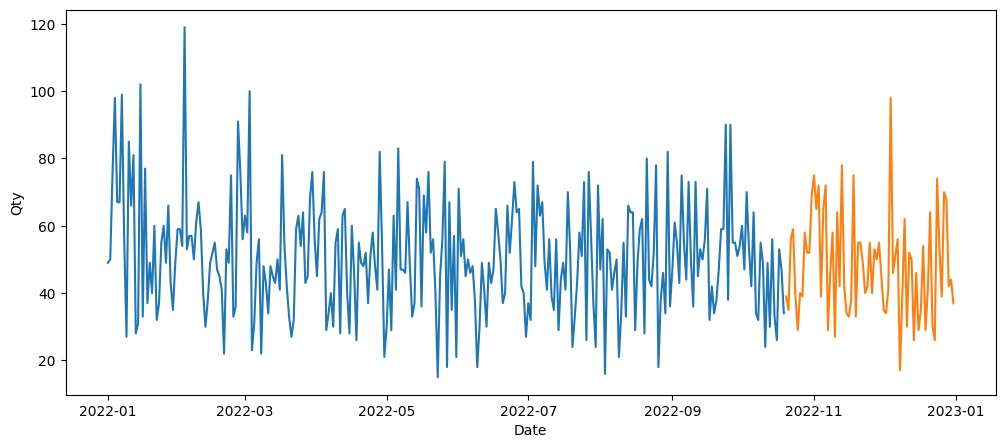

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

In [ ]:
p, d, q = 2, 2, 2
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()


start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 236.95776973292834


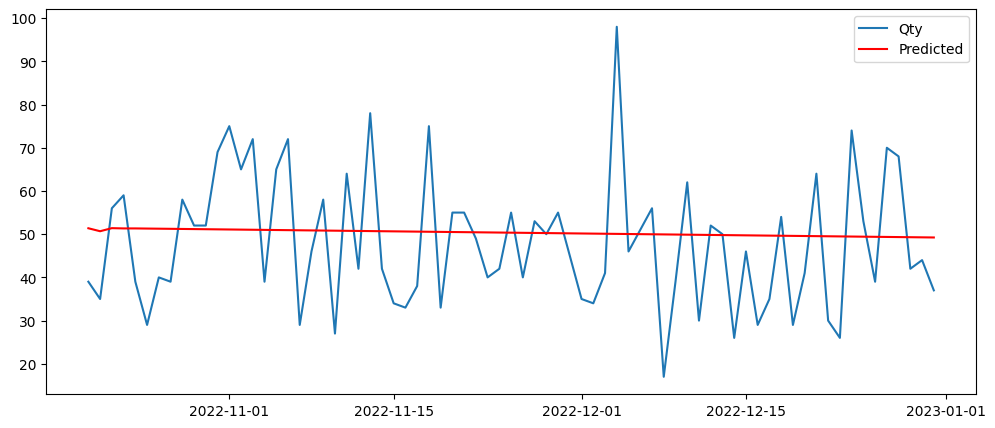

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', linestyle='-', label='Predicted')
plt.legend()
plt.show()


# Machine Learning (Clustering)

In [ ]:
aggregated = df7.groupby('CustomerID').agg({
'TransactionID' : 'count',
'Qty' : 'sum',
'TotalAmount' : 'sum'
}).reset_index()

X = aggregated [['TransactionID', 'Qty', 'TotalAmount']]


In [ ]:
num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=0)


kmeans.fit(X)


aggregated['Cluster'] = kmeans.labels_

print(aggregated.head())

cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  CustomerID  TransactionID  Qty  TotalAmount  Cluster
0          1             17   60       623300        2
1         10             14   50       478000        2
2        100              8   35       272400        1
3        101             14   44       439600        0
4        102             15   57       423300        0
Cluster Centers:
[[1.17120419e+01 4.26073298e+01 3.82103665e+05]
 [8.45783133e+00 2.96987952e+01 2.39316867e+05]
 [1.53222222e+01 5.80888889e+01 5.48162222e+05]]


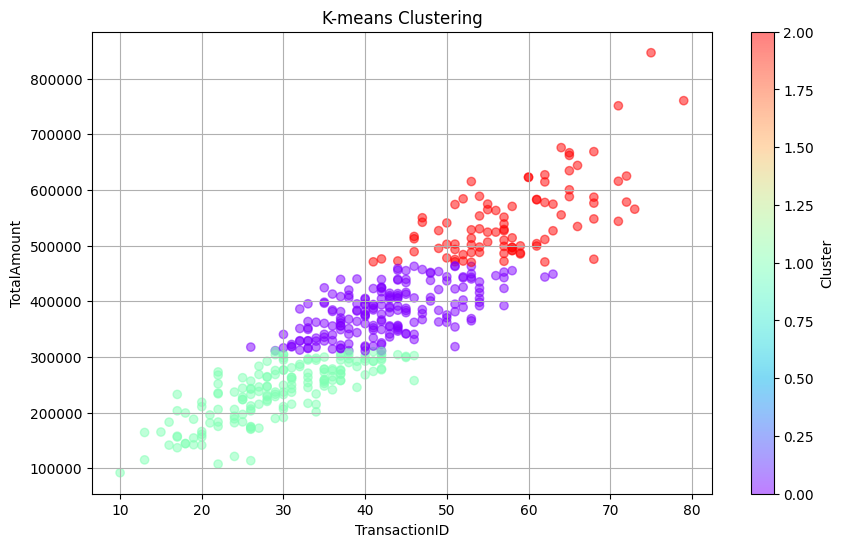

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X['Qty'],
    X['TotalAmount'],
    c=aggregated['Cluster'],
    cmap='rainbow',
    marker='o',
    alpha=0.5,
)
plt.xlabel('TransactionID')
plt.ylabel('TotalAmount')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

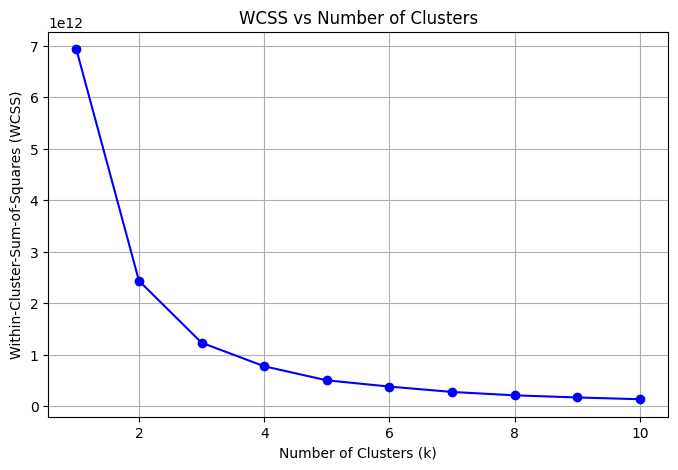

In [ ]:
wcss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.grid(True)
plt.show()

In [ ]:
model1 = KMeans(n_clusters=4, init = 'k-means++',n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X)
labels1=model1.labels_
centroids1 = model1.cluster_centers_

In [ ]:
df_cluster = aggregated.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount,Cluster
0,17,60,623300,2
1,14,50,478000,2
2,8,35,272400,1
3,14,44,439600,0
4,15,57,423300,0


<Figure size 600x600 with 0 Axes>

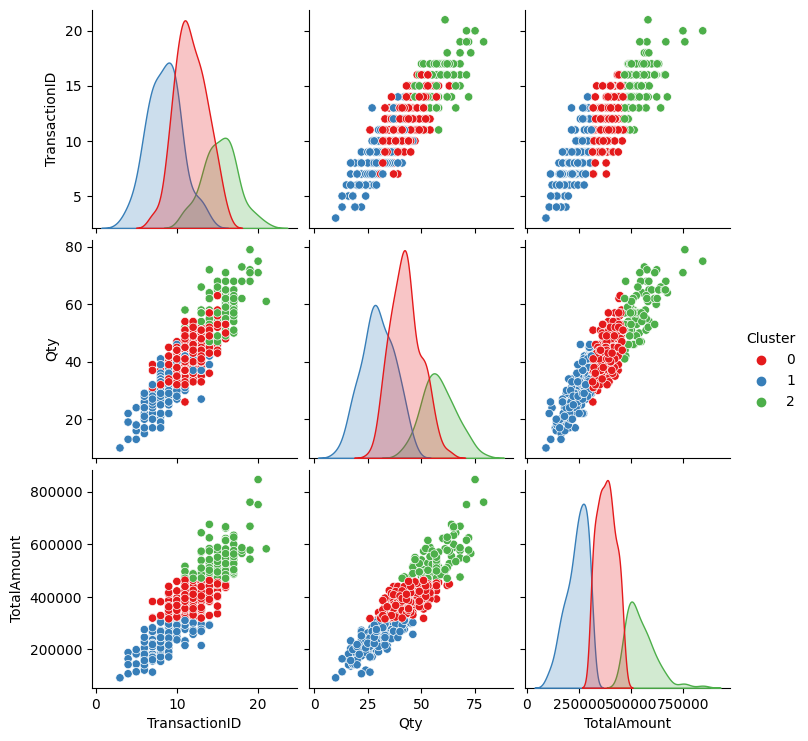

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='Cluster',palette='Set1')
plt.show()

In [ ]:
df7.to_csv('final.csv', index=False)